<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---
  

# COVID-19 landscape in Brazil

...Intro COVID...

With the goal to reassess the situation regarding the number of cases and deaths ocurring in Brazil, I will analyse recent data from [Our World in Data](https://ourworldindata.org/) regarding COVID-19 infections globally.

### Importing necessary packages

In [2]:
# importing necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

# getting plots to work in ipynb
%matplotlib inline

## Getting the data

*Descreva a fonte dos seus dados e um breve resumo sobre o que se pode esperar desse dataset.*

*Fale sobre a dificuldade de se analisar uma doença novas, os conflitos existentes entre os dados dos governos federal, estaduais e os não oficiais.*

### Variables codebook

The description of each variable was obtained from the [dataset codebook](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv), as provided by Our World in Data. 

<details>
<summary> Click the arrow to see the codebook. </summary>
  
* `iso_code` = The ISO 3166-1 alpha 3 codes representing the country names.
* `continent` = Continent of the geographical location.
* `location` = Geographical location. This variable also contains classification based on country income or entire continents.
* `date` = Data of the observation.
* `total_cases` = Total number of confirmed cases up until the date specified. Can include probable cases, where reported.
* `new_cases` = New confirmed cases. Can include probable cases, where reported. Negative values are replaced with NAs when the input was subject to data corretion.
* `new_cases_smoothed` = Same as above, 7-day smoothed.
* `total_deaths` = Total deaths attributed to COVID-19. Can include probable deaths, where reported.
* `new_deaths` = New deaths attributed to COVID-19. Can include probable deaths, where reported. Negative values are replaced with NAs when the input was subject to data corretion.
* `new_deaths_smoothed` = Same as above, 7-day smoothed.
* `total_cases_per_million` = Total cases per 1,000,000 people. Can include probable cases, where reported.
* `new_cases_per_million` = New confirmed cases per 1,000,000 people. Can include probable cases, where reported.
* `new_cases_smoothed_per_million` = Same as above, 7-day smoothed.
* `total_deaths_per_million` = Total deaths attributed to COVID-19 per 1,000,000 people. Can include probable deaths, where reported.
* `new_deaths_per_million` = New deaths attributed to COVID-19 per 1,000,000 people. Can include probable deaths, where reported.
* `new_deaths_smoothed_per_million` = Same as above, 7-day smoothed.
* `reproduction_rate` = Real time estimated of the effective reproductive rate (R) of COVID-19. For more info, see this [link](https://github.com/crondonm/TrackingR/tree/main/Estimates-Database).
* `icu_patients` = Number of COVID-19 patients in intensive care units (ICUs) on a given day.
* `icu_patients_per_million` = Same as above, per 1,000,000 people.
* `hosp_patients` = Number of COVID-19 patients in hospital on a given day.
* `hosp_patients_per_million` = Same as above, per 1,000,000 people.
* `weekly_icu_admissions` = Number of COVID-19 patients admitted to ICUs in a given week.
* `weekly_icu_admissions_per_million` = Same as above, per 1,000,000 people.
* `weekly_hosp_admissions` = Number of COVID-19 patients in hospital in a given week.
* `weekly_hosp_admissions_per_million` = Same as above, per 1,000,000 people.
* `total_tests` = Total tests for COVID-19.
* `new_tests` = New tests for COVID-19 (for consecutive days, only).
* `total_tests_per_thousand` = Total tests per 1,000 people.
* `new_tests_per_thousand` = New tests por 1,000 people.
* `new_tests_smoothed` = New tests, 7-day smoothed (assuming tests changed equally for countries that did not report daily testing).
* `new_tests_smoothed_per_thousand` = Same as above, per 1,000 people.
* `positive_rate` = Share of positive tests, as a rolling 7-day average (the inverse of tests_per_case).
* `tests_per_case` = Tests conducted per new confirmed case, as a rolling 7-day average.
* `tests_units` = Units used by the location to report its test data.
* `total_vaccinations` = Total number of vaccination doses administered.
* `people_vaccinated` = Total number of people with at least one dose of the vaccine.
* `people_fully_vaccinated` = Total number of people with all doses as per the initial vaccination protocol.
* `total_boosters` = Total number of booster doses administered (beyond the initial protocol).
* `new_vaccinations` = New doses administered.
* `new_vaccinations_smoothed` = Sabe as amove, 7-day smoothed (assuming vaccination changed equally for countries that did not report daily).
* `total_vaccinations_per_hundred` = Total number of doses administered per 100 people in the total population.
* `people_vaccinated_per_hundred` = Total number of people vaccinated with at least one dose per 100 people.
* `people_fully_vaccinated_per_hundred` = Total number of people with all doses (based on the initial protocol) per 100 people.
* `total_boosters_per_hundred` = Total number of vaccine boosters administered per 100 people.
* `new_vaccinations_smoothed_per_million` = New vaccines administered, 7-day smoothed, per 1,000,000 people.
* `new_people_vaccinated_smoothed` = Daily number of people receiving the first dose, 7-day smoothed.
* `new_people_vaccinated_smoothed_per_hundred` = Same as above, per 100 people.
* `stringency_index` = Government Response Stringency Index: composite measure based on response indicators, rescaled to a value from 0 to 100 (100 = strictest response).
* `population` = Latest available population values.
* `population_density` = Number of people by land area, in square km, for the most recent available year.
* `median_age` = Median age, UN projection for 2020.
* `aged_65_older` = Share of the population >= 65 years, for the most recent year.
* `aged_70_older` = Share of the population >= 70 years in 2015.
* `gdp_per_capita` = Gross domestic product at purchasing power parity (constant 2011 international dollars), for the most recent available year.
* `extreme_poverty` = Share of the population living in extreme poverty (most recent available year since 2010).
* `cardiovasc_death_rate` = Death rate of cardiovascular disease in 2017 (per 100,00 people).
* `diabetes_prevalence` = Diabetes prevalence (% of population aged 20 to 79) in 2017.
* `female_smokers` = Share of women who smoke, most recent year available.
* `male_smokers` = Share of men who smoke, most recent year avaiable.
* `handwashing_facilities` = Share of the population with basic handwashing facilities on premises, most recent year available.
* `hospital_beds_per_thousand` = Hospoital beds per 1,000 people, most recent year available since 2010.
* `life_expectancy` = Life expectancy at birth in 2019.
* `human_development_index` = 2019 values of HDI, measuring average achievement in three basic dimensions of human develompment (long and healthy life, knowledge and decent standard of living).
* `excess_mortality_cumulative_absolute` = Percentage difference between the reported number of weekly or monthly deaths in 2020-2921 and the projected number of deaths for the same period based on preivous years.
* `excess_mortality_cumulative` = Percentage difference between the cumulative number of deaths since 1 January 2020 and the cumulative projected deaths for the same period based on preivous years.
* `excess_mortality` = Cumulative difference between the reported number of deaths since 1 January 2020 and the projected number of deaths for the same period based on previous years.
* `excess_mortality_cumulative_per_million` = Same as above, per 1,000,000 people.
</details>

### Importing COVID-19 data

The data used here was obtained from [*Our World in Data*](https://github.com/owid/covid-19-data/tree/master/public/data) on 21/03/2022. I will start by loading the dataset as a dataframe.

In [3]:
# importing dataset into a dataframe
df = pd.read_csv("./data/owid-covid-data.csv")


#  # getting all column names to describe variables above
# for column in df.columns:
#     print("* `{}` = " .format(column))

## Exploratory analysis

First, I will explore the data to get some initial thoughts.




### Initial analysis

Vamos......

In [4]:
# checking dataset entries
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [5]:
# converting 'date' to datetime
df.date = pd.to_datetime(df.date)

# checking dataset size
df.shape

(169939, 67)

In [6]:
# checking data types
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.dtypes)

iso_code                                              object
continent                                             object
location                                              object
date                                          datetime64[ns]
total_cases                                          float64
new_cases                                            float64
new_cases_smoothed                                   float64
total_deaths                                         float64
new_deaths                                           float64
new_deaths_smoothed                                  float64
total_cases_per_million                              float64
new_cases_per_million                                float64
new_cases_smoothed_per_million                       float64
total_deaths_per_million                             float64
new_deaths_per_million                               float64
new_deaths_smoothed_per_million                      float64
reproduction_rate       

In [7]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print((df.isnull().sum()/df.shape[0]).sort_values(ascending=False))

weekly_icu_admissions_per_million             0.967094
weekly_icu_admissions                         0.967094
excess_mortality_cumulative_per_million       0.965799
excess_mortality                              0.965799
excess_mortality_cumulative                   0.965799
excess_mortality_cumulative_absolute          0.965799
weekly_hosp_admissions_per_million            0.934323
weekly_hosp_admissions                        0.934323
total_boosters                                0.890372
total_boosters_per_hundred                    0.890372
icu_patients_per_million                      0.860203
icu_patients                                  0.860203
hosp_patients                                 0.852223
hosp_patients_per_million                     0.852223
new_vaccinations                              0.774713
people_fully_vaccinated                       0.756171
people_fully_vaccinated_per_hundred           0.756171
people_vaccinated                             0.740301
people_vac

In [8]:
# what is the most recent date in the dataset
df.date.sort_values(ascending=False)[0:1]

169938   2022-03-20
Name: date, dtype: datetime64[ns]

In [9]:
# removing data that represent world/continents/classes
df_owid = df.loc[df.iso_code.str.startswith('OWID_')]

# checking all observations that match and counting how many entries
df_owid.iso_code.value_counts()


OWID_ASI    789
OWID_HIC    789
OWID_LMC    789
OWID_NAM    789
OWID_UMC    789
OWID_WRL    789
OWID_EUR    788
OWID_EUN    788
OWID_OCE    786
OWID_INT    773
OWID_AFR    767
OWID_SAM    758
OWID_LIC    757
OWID_KOS    737
OWID_CYN    317
Name: iso_code, dtype: int64

In [10]:
# removing these from the main dataframe
df = df.loc[~df.iso_code.str.startswith('OWID_')]

# checking
df.iso_code.str.startswith('OWID_').sum()

0

In [11]:
df_owid.loc[df_owid.date == "2022-03-20"].sort_values(by="total_deaths", ascending=False).head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
167764,OWID_WRL,NaN,World,2022-03-20,470737068.0,1023616.0,1769491.143,6077582.0,3022.0,5174.143,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
162217,OWID_UMC,NaN,Upper middle income,2022-03-20,123064003.0,121290.0,177814.000,2476195.0,1182.0,1585.286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68084,OWID_HIC,NaN,High income,2022-03-20,258372770.0,722989.0,1306109.286,2266661.0,1286.0,2972.571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51129,OWID_EUR,NaN,Europe,2022-03-20,171892361.0,392063.0,757955.429,1753751.0,893.0,1829.714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114552,OWID_NAM,NaN,North America,2022-03-20,94091488.0,14991.0,43522.000,1403035.0,257.0,1077.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# checking all owid entries
df_owid.location.value_counts()

Asia                   789
High income            789
Lower middle income    789
North America          789
Upper middle income    789
World                  789
Europe                 788
European Union         788
Oceania                786
International          773
Africa                 767
South America          758
Low income             757
Kosovo                 737
Northern Cyprus        317
Name: location, dtype: int64

In [22]:
# creating lists
income_list = ['Low income', 'Lower middle income', 'Upper middle income', 'High income']
continent_list = ['Asia', 'Europe', 'Oceania', 'Africa', 'South America', 'North America']

# separating income-based data
df_income = df_owid.loc[df_owid.location.isin(income_list)]
df_income.location.value_counts()


High income            789
Lower middle income    789
Upper middle income    789
Low income             757
Name: location, dtype: int64

In [23]:
# separating continent based data
df_continent = df_owid.loc[df_owid.location.isin(continent_list)]
df_continent.location.value_counts()

Asia             789
North America    789
Europe           788
Oceania          786
Africa           767
South America    758
Name: location, dtype: int64

In [24]:
# 5 countries with most deaths up until 2022-03-20
top5MostDeaths = df.loc[df.date == "2022-03-20"].sort_values(by="total_deaths", ascending=False).head(5)

# 5 countries with most cases up until 2022-03-20
top5MostCases = df.loc[df.date == "2022-03-20"].sort_values(by="total_cases", ascending=False).head(5)

Text(0, 0.5, 'Total number of cases')

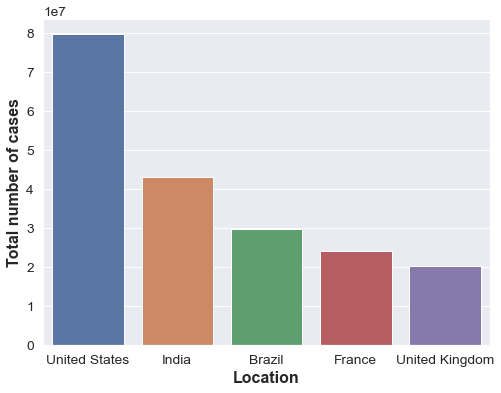

In [87]:
# plotting bar plot of top5 most deaths and cases
sns.set_theme()
plt.figure(figsize=(8, 6))
sns.set(font_scale = 1.25)
p_mostCases = sns.barplot(x='location', y='total_cases', data=top5MostCases)
p_mostCases.set_xlabel('Location', weight='bold', fontsize=16)
p_mostCases.set_ylabel('Total number of cases', weight='bold', fontsize=16)

* Plotar um gráfico de barras para os 5 países com mais mortes
    * `df.loc[df.date == '2020-06-14', ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[1:6]`
    * `ax.bar('location', 'total_deaths', data=top5_total_deaths)`
* Plotar um gráfico de linhas para ver a evolução do total de casos de COVID-19 no mundo.
    * `df.loc[df.location == "World", "total_deaths"].reset_index(drop=True).plot()`
* [OPCIONAL] Plotar um gráfico de dispersão considerando `gdp_per_capita` (ou seja, o PIB dos países) pelo número total de mortos. Pegue a data mais recente apenas.
    * Lembre-se que não é nada conclusivo, pois envolve fatores como proporcão de testes, etc.

### Análise Exploratória para o Brasil

* Criar uma cópia do DataFrame apenas com o Brasil
    * `df_brasil = df.loc[df.location == "Brazil"].copy()`
* Identificar quando foi registrada a primeira morte no Brasil
* Identificar quantos dias demorou para registrarmos a primeira morte, considerando o primeiro caso de COVID-19 registrado.
* Plotar gráficos de linha em escalas linear e logarítmica para os casos totais e mortes totais.

In [15]:
# getting data from Brazil only
df_brasil = df.loc[df.location == "Brazil"].copy()

## Conclusão

*Escreva suas conclusões e análises sobre os dados relativos à COVID-19...*